<a href="https://colab.research.google.com/github/Ali-Ahmadi/Digital-Image-Processing/blob/master/01_histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Görüntü Geliştirme - Görüntü Histogramı
![bir görüntünün histogramı](https://staff.fnwi.uva.nl/r.vandenboomgaard/IPCV20172018/_images/histeq.png)

Bu bölümde Python'da OpenCV kullanarak bir görüntünün histogramını ve kümülatif histogramını nasıl hesaplayıp çizeceğinizi göreceksiniz.

Daha fazla bilgiyi OpenCV belgelerinde bulabilirsiniz.
[Buradan](https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html)

Görüntü işleme için gerekli olan gerekli paketleri içe aktarın.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(([], []), ([], []))

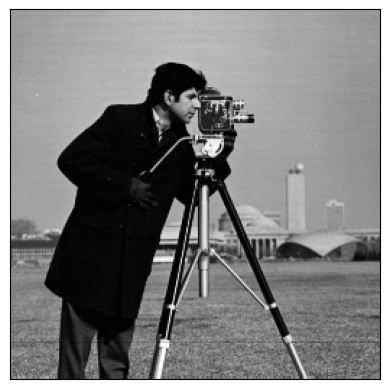

In [2]:
img = cv2.imread('/content/cameraman.tif', 0)
plt.imshow(img, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

## 1-Bir görüntünün histogramı

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

**images** : uint8 veya float32 türünün kaynak görüntüsüdür. köşeli parantez içinde yani "[img]" olarak verilmelidir.

**channels** : köşeli parantez içinde de verilmiştir. Histogramı hesapladığımız kanalın indeksidir. Örneğin, giriş gri tonlamalı görüntü ise değeri [0] olur. Renkli görüntü için sırasıyla mavi, yeşil veya kırmızı kanalın histogramını hesaplamak üzere [0], [1] veya [2]'yi geçebilirsiniz.

**mask** : maske resmi. Tam görüntünün histogramını bulmak için "Yok" olarak verilir. Ancak görüntünün belirli bir bölgesinin histogramını bulmak istiyorsanız, bunun için bir maske görüntüsü oluşturmanız ve onu maske olarak vermeniz gerekir. (Daha sonra bir örnek göstereceğim.)

**histSize** : bu BIN sayımızı temsil eder. Köşeli parantez içinde verilmesi gerekiyor. Tam ölçek için [256]'yı geçiyoruz.

**ranges*** : bu bizim ARALIĞIMIZdır. Normalde [0,256]'dır.

Text(0, 0.5, 'Sıklık')

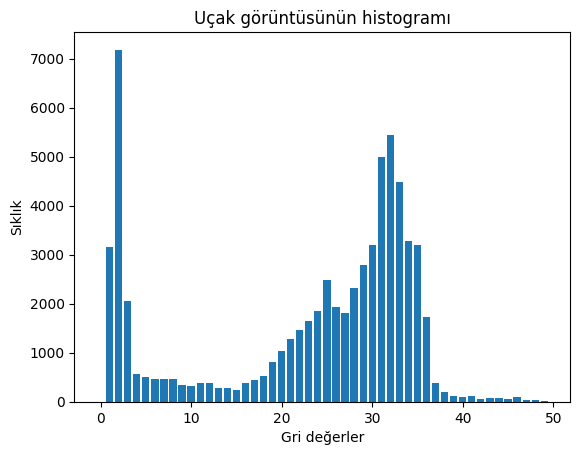

In [3]:
hist = cv2.calcHist([img],[0],None,[50],[0,256])

# histogramı görüntülemek için farklı yöntemler
plt.bar(range(50), hist.ravel())
plt.title('Uçak görüntüsünün histogramı')
plt.xlabel('Gri değerler')
plt.ylabel('Sıklık')

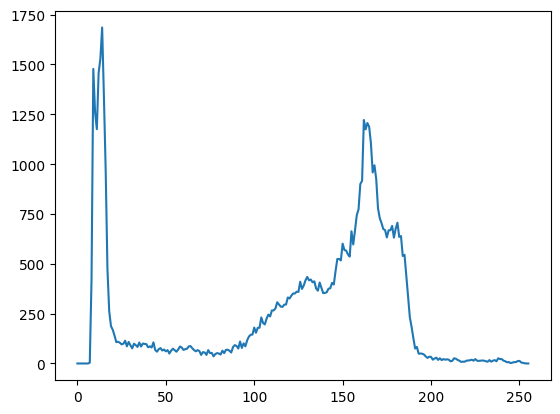

In [4]:
# Diğer yöntem
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)

Başka bir örneğe bakalım.

In [7]:
# İki görseli daha okuyalım
high = cv2.imread('hist_highkey.jpg')
low = cv2.imread('hist_lowkey.jpg')

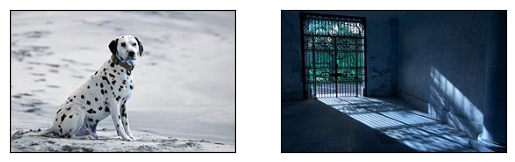

In [8]:
# Fotoğrafları göster
plt.subplot(121), plt.imshow(high)
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(low)
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.show()

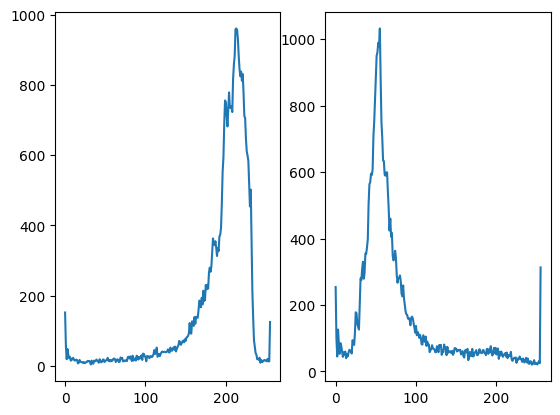

In [9]:
# Son kanal için her iki görüntünün histogramını hesaplayın.
# Kanallar 0'dan 2'ye kadar farklılık gösterebilir.
hist_high = cv2.calcHist([high],[2],None,[256],[0,256])
hist_low = cv2.calcHist([low],[2],None,[256],[0,256])

# Histogramların grafiğini çizin
plt.subplot(121)
plt.plot(hist_high)

plt.subplot(122)
plt.plot(hist_low)

plt.show()

## 2-Bir görüntünün kümülatif histogramı

**Bir görüntünün kümülatif dağıtım fonksiyonunu (CDF) hesaplayın**

Bir görüntünün kümülatif histogramı, o görüntünün histogramının kümülatif toplamının hesaplanmasıyla üretilir. OpenCV'de bir görüntünün CDF'sini elde etmek için özel bir işlev yoktur; bu nedenle Numpy'de cumsum fonksiyonunu kullanıyoruz. İşlev hakkında daha fazla bilgi bulabilirsiniz [Burada](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)


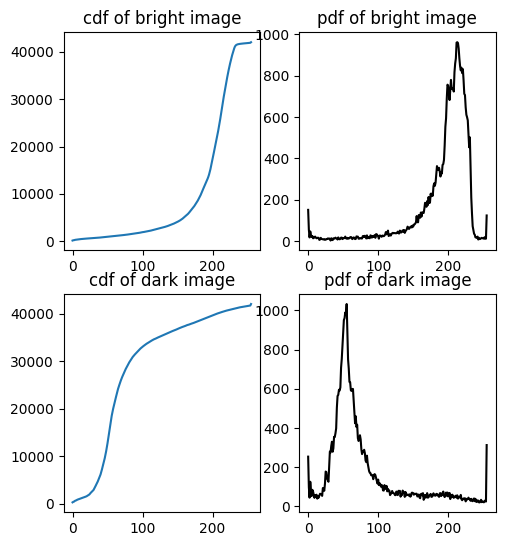

In [10]:
cdf_low = hist_low.cumsum()
cdf_high = hist_high.cumsum()

# kümülatif histogramların grafiğini çizme
plt.subplot(221), plt.plot(cdf_high), plt. title('cdf of bright image')
plt.subplot(222), plt.plot(hist_high, 'k'), plt. title('pdf of bright image')

plt.subplot(223), plt.plot(cdf_low), plt. title('cdf of dark image')
plt.subplot(224), plt.plot(hist_low, 'k'), plt. title('pdf of dark image')

# alt grafiklerin yerleşimini ayarlayın
plt.subplots_adjust(bottom=2, right=0.8, top=3)

plt.show()

## 3-Histogram manipülasyonu

Görüntü manipülasyonuna devam etmek için öncelikle `cv2.cvtColor()` kullanarak RGB görüntülerini gri tonlamaya dönüştürüyoruz.



In [11]:
low_gray = cv2.cvtColor(low, cv2.COLOR_BGR2GRAY)
high_gray = cv2.cvtColor(high, cv2.COLOR_BGR2GRAY)

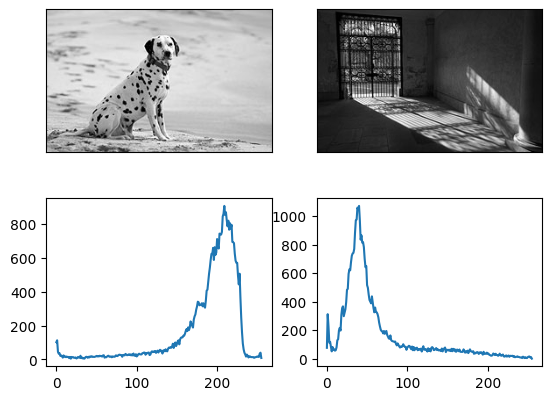

In [12]:
# görüntüleri ve histogramlarını göster
plt.subplot(221), plt.imshow(high_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.plot(cv2.calcHist([high_gray],[0],None,[256],[0,256]))

plt.subplot(222), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256]))

plt.show()

### 3-1 Parlaklık

Bir görüntünün parlaklığını ve kontrastını değiştirmek için genellikle *kontrast* ve *parlaklık* için sırasıyla $\alpha$ ve $\beta$ şeklinde iki parametre kullanılır.

$g(i,j) = \alpha \cdot f(i,j) + \beta$

'manip_image(image, alpha, beta)' işlevi $\alpha$ ve $\beta$'ı alır ve çıktı görüntüsünü üretir.

Aşağıda sadece parlaklık değerini ($\beta$) değiştiriyoruz ve $\alpha = 1$ olarak bırakıyoruz. Bir sonraki bölümde $\beta$'ı değiştirme konusuna döneceğiz; $\beta$ görüntü kontrastını değiştirecektir.

In [13]:
# Manipülasyonu kolayca gerçekleştirecek bir işlev tanımlayın.
def manip_image(image, alpha, beta):

  new_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        new_image[y,x] = np.clip(alpha*image[y,x] + beta, 0, 255)

  return new_image

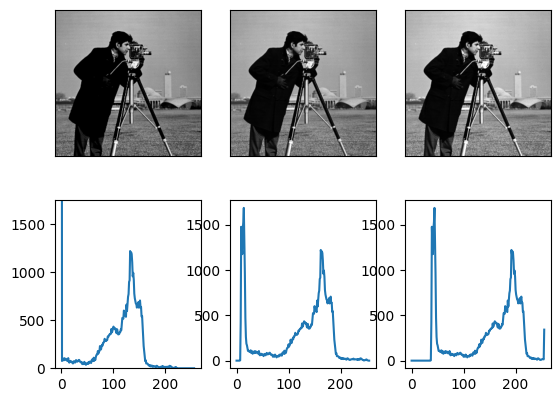

In [14]:
# Resim üzerinde test edin
bright = manip_image(img, 1, 30)
dark = manip_image(img, 1, -30)

# Sonuçları karşılaştırın
plt.figure()
plt.subplot(231), plt.imshow(dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(bright, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(234)
plt.plot(cv2.calcHist([dark],[0],None,[256],[0,256])), plt.ylim((0, 1750))

plt.subplot(235)
plt.plot(cv2.calcHist([img],[0],None,[256],[0,256]))

plt.subplot(236)
plt.plot(cv2.calcHist([bright],[0],None,[256],[0,256]))

Histogramın ileri ve geri kaymalarını görebilirsiniz. Parlaklığı arttırdığımızda ve azalttığımızda histogram sırasıyla daha parlak ve daha karanlık bölgelere doğru hareket eder.

([<matplotlib.lines.Line2D at 0x79b632519210>], (0.0, 1100.0))

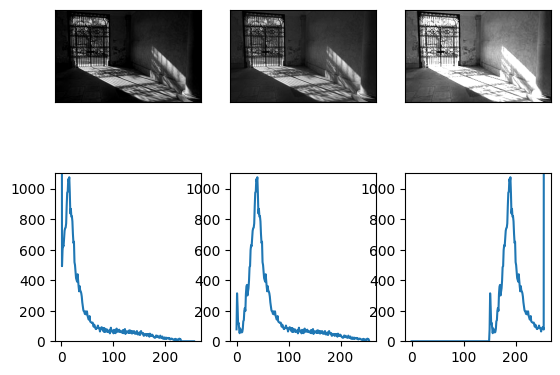

In [15]:
# Karanlık görüntü üzerinde test edin
l_bright = manip_image(low_gray, 1, 150)
l_dark = manip_image(low_gray, 1, -25)

# Sonuçları karşılaştırın
plt.figure()
plt.subplot(231), plt.imshow(l_dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(l_bright, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(234)
plt.plot(cv2.calcHist([l_dark],[0],None,[256],[0,256])), plt.ylim((0, 1100))

plt.subplot(235)
plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256])), plt.ylim((0, 1100))

plt.subplot(236)
plt.plot(cv2.calcHist([l_bright],[0],None,[256],[0,256])), plt.ylim((0, 1100))

###3-2 Kontrast

Bir görüntünün kontrastı farklı şekillerde tanımlanabilir. Basit bir temel kural, kontrastı bir görüntüdeki en büyük ve en küçük değerler arasındaki mesafe olarak ele almaktır. Aslında, gri değerler $2^k-1$ aralığına ne kadar çok dağıtılırsa kontrast da o kadar fazla olacaktır.

Yoğunluk aralığının her yerine eşit şekilde dağıtılmış değerlere sahip tekdüze bir histogram en yüksek kontrasta sahip olacaktır. Bir sonraki bölümümüz olan Histogram eşitlemenin konsepti bu olacak.

(0.0, 1750.0)

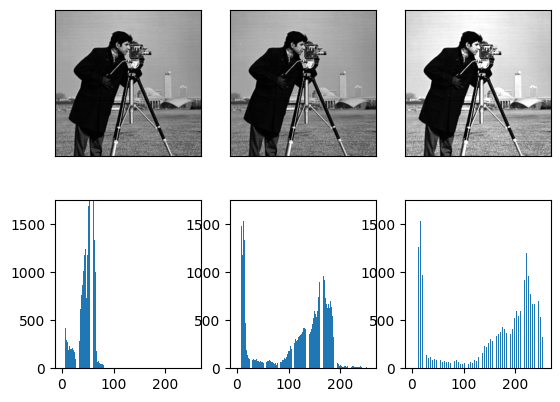

In [16]:
# Resim üzerinde test edin
increase_contrast = manip_image(img, 1.35, 0)
decrease_contrast = manip_image(img, 0.35, 0)

# Sonuçları karşılaştırın
plt.figure()
plt.subplot(231), plt.imshow(decrease_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(increase_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(234)
plt.bar(range(256),
        cv2.calcHist([decrease_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

plt.subplot(235)
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

plt.subplot(236)
plt.bar(range(256),
        cv2.calcHist([increase_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

## Histogram eşitleme

Histogramını mükemmel histogram şekline (düzgün dağılmış) benzer hale getirmek amacıyla bir görüntünün yoğunluk değerlerini uzatmanın genel bir yöntemi, histogram eşitlemesidir. Bu yöntemde görüntü histogramı kümülatif dağılım fonksiyonuna göre genişletilecektir. Histogram eşitlemenin çok iyi bir açıklaması şurada bulunur: [Buradan](https://docs.opencv.org/2.4.13.7/doc/tutorials/imgproc/histograms/histogram_equalization/histogram_equalization.html).

**cv2.equalizeHist(src[, dst])**

**src** : gerekli olan tek argüman eşitlenecek orijinal görüntüdür.

<BarContainer object of 256 artists>

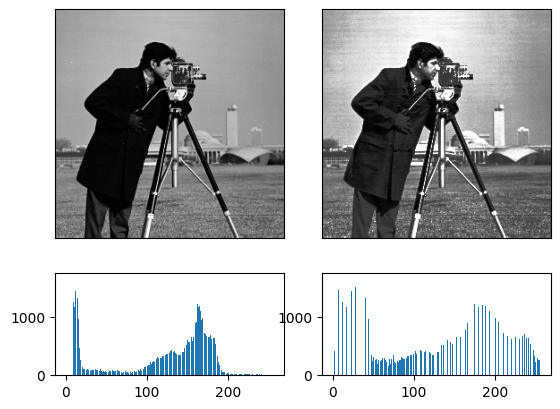

In [17]:
img_eq = cv2.equalizeHist(img)

grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)

plt.subplot(grid[:2, :2])
plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[:2, 2:])
plt.imshow(img_eq, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[2, :2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())

plt.subplot(grid[2, 2:])
plt.bar(range(256),
        cv2.calcHist([img_eq],[0],None,[256],[0,256]).ravel())


### CLAHE (Kontrast Sınırlı Uyarlanabilir Histogram Eşitleme)
Yukarıda görebileceğiniz gibi eşitlenmiş görüntüde görüntünün bazı kısımları diğer kısımlara göre daha parlaktır. Görüntü iyileştirmede bu artefaktları azaltmak için uyarlanabilir bir algoritma geliştirildi. Bu algoritma aynı histogram eşitlemesini görüntünün küçük döşemelerinde gerçekleştirir; daha iyi görsel hislerle sonuçlanır.

CLAHE gerçekleştirmek için öncelikle bir CLAHE nesnesi oluşturulmalıdır. Daha sonra görüntünün üzerine uygulanır. İki parametre, _tile number_ ve _limit_ belirtilmelidir.

Farklı döşeme boyutlarını ve sınırlarını deneyebilir ve görüntünün gelişimini kontrol edebilirsiniz.

<BarContainer object of 256 artists>

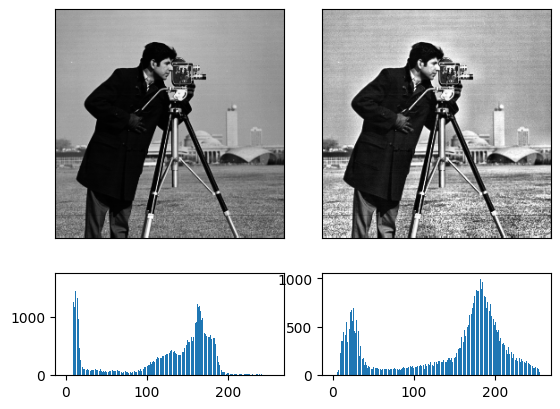

In [18]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
img_cl = clahe.apply(img)

grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)

plt.subplot(grid[:2, :2])
plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[:2, 2:])
plt.imshow(img_cl, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[2, :2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())

plt.subplot(grid[2, 2:])
plt.bar(range(256),
        cv2.calcHist([img_cl],[0],None,[256],[0,256]).ravel())